In [1]:
from Unet_model import *

Using TensorFlow backend.


In [2]:
#load the train images
train_items = os.listdir('X_train\\')
print(len(train_items))

40


In [4]:
# read, resize and normalize images
import cv2
X_train = []

for each_image in train_items:
  if each_image.endswith(".png"):
      
      full_path ='X_train\\' + each_image
      
      image = cv2.imread(full_path)
      image = cv2.resize(image,(128,128),interpolation=cv2.INTER_AREA)
      image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
      image = image/255.
      
      X_train.append(image)

print(image.shape)
X_train = np.asarray(X_train)
print(X_train.shape)

(128, 128, 3)
(40, 128, 128, 3)


In [5]:
#load the train images masks
train_mask_items = os.listdir('y_train\\')
print(len(train_mask_items))

40


In [6]:
# read, resize and normalize images

y_train = []

for each_image in train_mask_items:
  if each_image.endswith(".png"):
      
      full_path ='y_train\\' + each_image
      
      image = cv2.imread(full_path,0)
      image = cv2.resize(image,(128,128),interpolation=cv2.INTER_AREA)
      image=image/255
      y_train.append(image)

print(image.shape)
y_train = np.asarray(y_train)
y_train = y_train.reshape((40,128,128,1))

print(y_train.shape)

(128, 128)
(40, 128, 128, 1)


In [7]:
#load the validation images
valid_items = os.listdir('X_valid')
print(len(valid_items))

10


In [8]:
#read, resize and normalize images
X_valid = []

for each_image in valid_items:
  if each_image.endswith(".png"):
      
      full_path ='X_valid\\' + each_image
      
      image = cv2.imread(full_path)
      image = cv2.resize(image,(128,128),interpolation=cv2.INTER_AREA)
      image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
      image = image/255.
      X_valid.append(image)

print(image.shape)
X_valid = np.asarray(X_valid)

print(X_valid.shape)

(128, 128, 3)
(10, 128, 128, 3)


In [9]:
#load validation images masks
valid_mask_items = os.listdir('y_valid')
print(len(valid_mask_items))

10


In [10]:
#read, resize and normalize images
y_valid = []

for each_image in valid_mask_items:
  if each_image.endswith(".png"):
      
      full_path ='y_valid\\' + each_image
      
      image = cv2.imread(full_path,0)
      image = cv2.resize(image,(128,128),interpolation=cv2.INTER_AREA)
      image=image/255
      y_valid.append(image)

print(image.shape)
y_valid = np.asarray(y_valid)
y_valid = y_valid.reshape((10,128,128,1))
print(y_valid.shape)

(128, 128)
(10, 128, 128, 1)


In [11]:
#All shapes of train and valid images with masks
print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)

(40, 128, 128, 3)
(40, 128, 128, 1)
(10, 128, 128, 3)
(10, 128, 128, 1)


In [12]:
#compiling the model
input_img = Input((128, 128, 3), name='img')
model = unet(input_img, n_filters=16, dropout=0.05, batchnorm=True)
model.compile(optimizer=Adam(), loss="binary_crossentropy", metrics=["accuracy"])

In [13]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
img (InputLayer)                (None, 128, 128, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 128, 128, 16) 448         img[0][0]                        
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 128, 128, 16) 64          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 128, 128, 16) 0           batch_normalization_1[0][0]      
____________________________________________________________________________________________

In [14]:
callbacks = [
    EarlyStopping(patience=10, verbose=1),
    ReduceLROnPlateau(factor=0.1, patience=5, min_lr=0.00001, verbose=1),
    ModelCheckpoint('model.h5', verbose=1, save_best_only=True, save_weights_only=True)
]

In [15]:
results = model.fit(X_train, y_train, batch_size=16, epochs=50, callbacks=callbacks,\
                    validation_data=(X_valid, y_valid))

Train on 40 samples, validate on 10 samples
Epoch 1/50
40/40 [==============================] - 5s 123ms/step - loss: 0.6376 - accuracy: 0.6998 - val_loss: 0.6914 - val_accuracy: 0.4951

Epoch 00001: val_loss improved from inf to 0.69137, saving model to model.h5
Epoch 2/50
40/40 [==============================] - 3s 82ms/step - loss: 0.4760 - accuracy: 0.9073 - val_loss: 0.6873 - val_accuracy: 0.5990

Epoch 00002: val_loss improved from 0.69137 to 0.68726, saving model to model.h5
Epoch 3/50
40/40 [==============================] - 3s 84ms/step - loss: 0.4056 - accuracy: 0.9360 - val_loss: 0.6517 - val_accuracy: 0.8898

Epoch 00003: val_loss improved from 0.68726 to 0.65173, saving model to model.h5
Epoch 4/50
40/40 [==============================] - 3s 81ms/step - loss: 0.3620 - accuracy: 0.9505 - val_loss: 0.5996 - val_accuracy: 0.9621

Epoch 00004: val_loss improved from 0.65173 to 0.59965, saving model to model.h5
Epoch 5/50
40/40 [==============================] - 3s 83ms/step - 

40/40 [==============================] - 4s 90ms/step - loss: 0.1007 - accuracy: 0.9976 - val_loss: 0.1529 - val_accuracy: 0.9724

Epoch 00037: val_loss improved from 0.15562 to 0.15287, saving model to model.h5
Epoch 38/50
40/40 [==============================] - 3s 85ms/step - loss: 0.0983 - accuracy: 0.9977 - val_loss: 0.1497 - val_accuracy: 0.9725

Epoch 00038: val_loss improved from 0.15287 to 0.14971, saving model to model.h5
Epoch 39/50
40/40 [==============================] - 4s 92ms/step - loss: 0.0960 - accuracy: 0.9977 - val_loss: 0.1476 - val_accuracy: 0.9724

Epoch 00039: val_loss improved from 0.14971 to 0.14760, saving model to model.h5
Epoch 40/50
40/40 [==============================] - 4s 100ms/step - loss: 0.0938 - accuracy: 0.9977 - val_loss: 0.1451 - val_accuracy: 0.9724

Epoch 00040: val_loss improved from 0.14760 to 0.14513, saving model to model.h5
Epoch 41/50
40/40 [==============================] - 3s 85ms/step - loss: 0.0917 - accuracy: 0.9977 - val_loss: 0.1

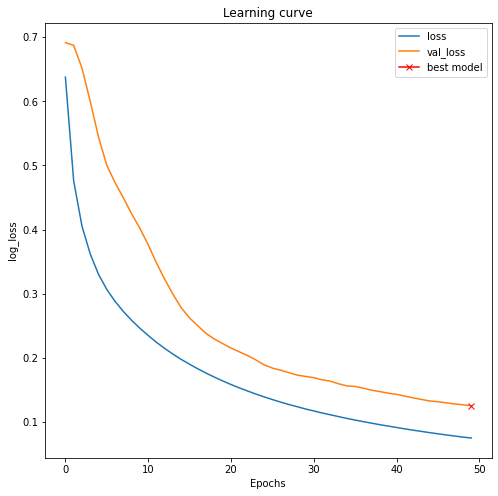

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
plt.title("Learning curve")
plt.plot(results.history["loss"], label="loss")
plt.plot(results.history["val_loss"], label="val_loss")
plt.plot( np.argmin(results.history["val_loss"]), np.min(results.history["val_loss"]), marker="x", color="r", label="best model")
plt.xlabel("Epochs")
plt.ylabel("log_loss")
plt.legend();

In [18]:
# load the best model
model.load_weights('model.h5')

In [19]:
# Evaluate on validation set (this must be equals to the best log_loss)
model.evaluate(X_valid, y_valid, verbose=1)

10/10 [==============================] - 0s 23ms/step


[0.1255926489830017, 0.972412109375]

In [20]:
predict_train = model.predict(X_train, verbose=1)
predict_val = model.predict(X_valid, verbose=1)

10/10 [==============================] - 0s 22ms/step


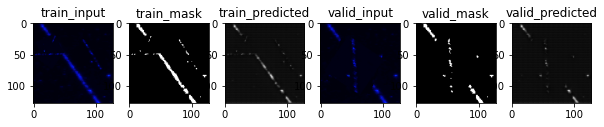

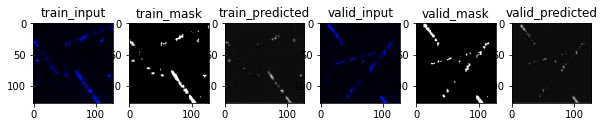

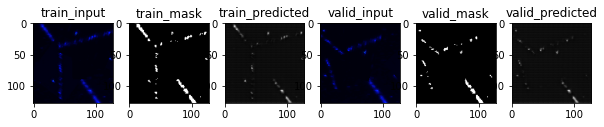

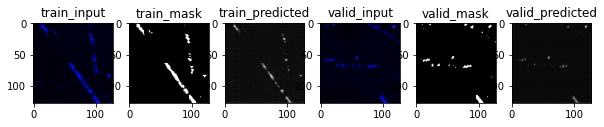

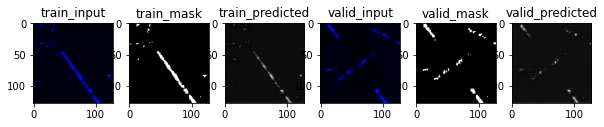

In [21]:
# plot the prediction on trained and validation images
import matplotlib.pyplot as plt
for i in range(1,10,2):
    #on train images
    fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(1, 6, figsize = (10, 10))

    ax1.imshow(X_train[i])
    ax1.set_title('train_input')

    ax2.imshow(y_train[i].squeeze(), cmap='gray' )
    ax2.set_title('train_mask')

    ax3.imshow(predict_train[i].squeeze(), cmap='gray')
    ax3.set_title('train_predicted')
    
    #on valid images

    ax4.imshow(X_valid[i])
    ax4.set_title('valid_input')

    ax5.imshow(y_valid[i].squeeze(), cmap='gray' )
    ax5.set_title('valid_mask')

    ax6.imshow(predict_val[i].squeeze(), cmap='gray')
    ax6.set_title('valid_predicted')

In [22]:
#load the real images
real_images = os.listdir('real_imgs\\')
print(len(real_images))

10


In [23]:
#read, resize and normalize the images
real_imgs = []

for each_image in real_images:
  if each_image.endswith(".png"):
      
      full_path ='real_imgs\\' + each_image
      
      image = cv2.imread(full_path)
      image = cv2.resize(image,(128,128),interpolation=cv2.INTER_AREA)
      image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
      image = image/255.
      real_imgs.append(image)
    
print(image.shape)
real_imgs = np.asarray(real_imgs)

print(real_imgs.shape)

(128, 128, 3)
(10, 128, 128, 3)


In [24]:
#load the real images masks
real_images_masks = os.listdir('real_imgs_masks\\')
print(len(real_images_masks))

10


In [25]:
#read, resize and normalize the images
real_imgs_masks = []

for each_image in real_images_masks:
  if each_image.endswith(".png"):
      
      full_path ='real_imgs_masks\\' + each_image
      
      image = cv2.imread(full_path)
      image = cv2.resize(image,(128,128),interpolation=cv2.INTER_AREA)
      image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
      image = image/255
      real_imgs_masks.append(image)

print(image.shape)
real_imgs_masks = np.asarray(real_imgs_masks)
real_imgs_masks = real_imgs_masks.reshape((10,128,128,1))

print(real_imgs_masks.shape)

(128, 128)
(10, 128, 128, 1)


In [26]:
#predict on real images
predict = model.predict(real_imgs, verbose=1)
print(predict.shape)

10/10 [==============================] - 0s 24ms/step
(10, 128, 128, 1)


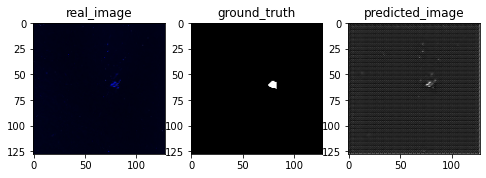

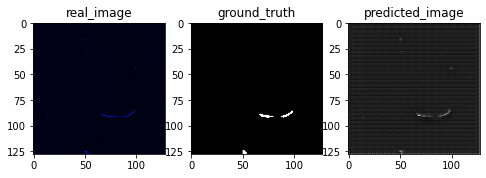

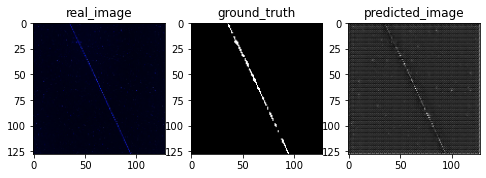

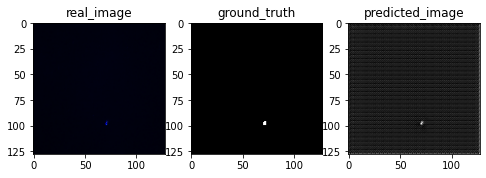

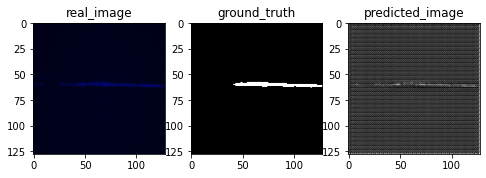

In [30]:
#plot the prediction on real images
for i in range(0,10,2):
    fig, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize = (8, 8))

    ax1.imshow(real_imgs[i])
    ax1.set_title('real_image')

    ax2.imshow(real_imgs_masks[i].squeeze(), cmap='gray' )
    ax2.set_title('ground_truth')

    ax3.imshow(predict[i].squeeze(), cmap='gray')
    ax3.set_title('predicted_image')